In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/shreemit/miniforge3/envs/leaseGPT/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [17]:
movies = pd.read_csv('movies.csv')
movies['genres'] = movies['genres'].apply(lambda x: x.split("|"))
ratings = pd.read_csv('ratings.csv')

In [18]:
from collections import Counter

genres_counts = Counter(g for genres in movies['genres'] for g in genres)
print(f"There are {len(genres_counts)} genre labels.")
genres_counts

There are 20 genre labels.


Counter({'Adventure': 1263,
         'Animation': 611,
         'Children': 664,
         'Comedy': 3756,
         'Fantasy': 779,
         'Romance': 1596,
         'Drama': 4361,
         'Action': 1828,
         'Crime': 1199,
         'Thriller': 1894,
         'Horror': 978,
         'Mystery': 573,
         'Sci-Fi': 980,
         'War': 382,
         'Musical': 334,
         'Documentary': 440,
         'IMAX': 158,
         'Western': 167,
         'Film-Noir': 87,
         '(no genres listed)': 34})

In [19]:
print("The 5 most common genres: \n", genres_counts.most_common(5))

The 5 most common genres: 
 [('Drama', 4361), ('Comedy', 3756), ('Thriller', 1894), ('Action', 1828), ('Romance', 1596)]


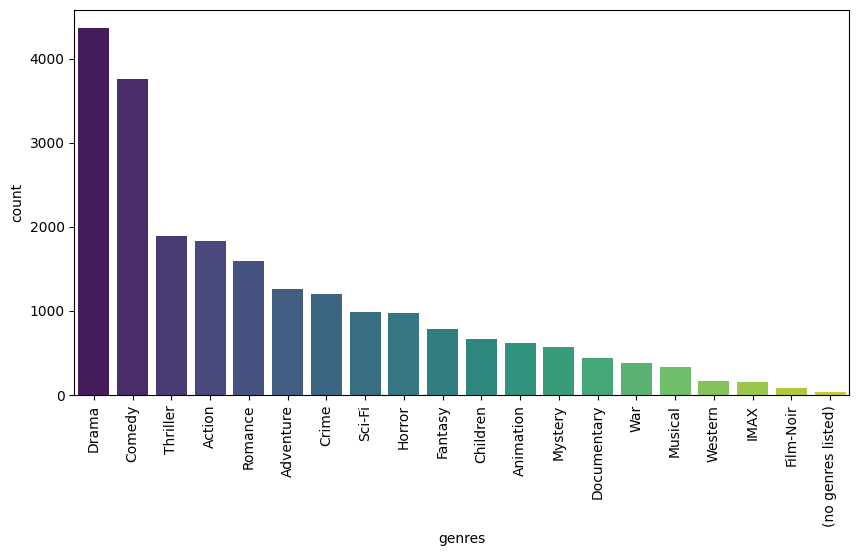

In [20]:
genres_counts_df = pd.DataFrame([genres_counts]).T.reset_index()
genres_counts_df.columns = ['genres', 'count']
genres_counts_df = genres_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='genres', y='count', data=genres_counts_df, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [22]:
import re 

def extract_year_from_title(title):
    t = title.split(' ')
    year = None
    if re.search(r'\(\d+\)', t[-1]):
        year = t[-1].strip('()')
        year = int(year)
    return year

movies['year'] = movies['title'].apply(extract_year_from_title)

In [23]:
movies['year'].nunique()

106

In [24]:
print(f"Original number of movies: {movies['movieId'].nunique()}")
movies = movies[~movies['year'].isnull()]
print(f"Number of movies after removing movies with missing year: {movies['movieId'].nunique()}")

Original number of movies: 9742
Number of movies after removing movies with missing year: 9718


In [25]:
# change the format of the year column
movies['year'] = movies['year'].astype(int)

/var/folders/q9/_hwzlyzd14qc0xyjstc7df380000gn/T/ipykernel_44141/260182128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['year'] = movies['year'].astype(int)


In [26]:
def round_down(year):
    return year - (year%10)

round_down(1932)

1930

In [27]:
movies['decade'] = movies['year'].apply(round_down)

/var/folders/q9/_hwzlyzd14qc0xyjstc7df380000gn/T/ipykernel_44141/3242564523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['decade'] = movies['year'].apply(round_down)


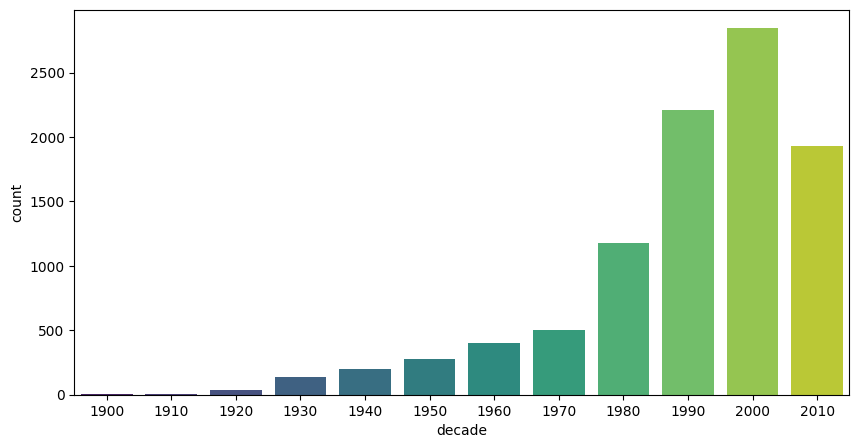

In [31]:
# bar plot of the number of movies per decade
plt.figure(figsize=(10,5))
sns.countplot(x='decade', data=movies, palette='viridis')   
plt.show()

In [32]:
genres = list(genres_counts.keys())

for g in genres:
    movies[g] = movies['genres'].transform(lambda x: int(g in x))

/var/folders/q9/_hwzlyzd14qc0xyjstc7df380000gn/T/ipykernel_44141/942438303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[g] = movies['genres'].transform(lambda x: int(g in x))
/var/folders/q9/_hwzlyzd14qc0xyjstc7df380000gn/T/ipykernel_44141/942438303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[g] = movies['genres'].transform(lambda x: int(g in x))
/var/folders/q9/_hwzlyzd14qc0xyjstc7df380000gn/T/ipykernel_44141/942438303.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [33]:
movies

,movieId,title,genres,year,decade,Adventure,Animation,Children,Comedy,Fantasy,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,1990,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,1990,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,1990,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],1995,1990,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",2017,2010,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017,2010,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),[Drama],2017,2010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018,2010,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
movie_decades = pd.get_dummies(movies['decade'])
movie_decades.head()

,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False


In [35]:
movie_features = pd.concat([movies[genres], movie_decades], axis=1)
movie_features.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,1,1,1,1,1,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,1,0,1,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
2,0,0,0,1,0,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,0,0,0,1,0,1,1,0,0,0,...,False,False,False,False,False,False,False,True,False,False
4,0,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False


In [52]:
pd.to_pickle(movie_features, 'movie_features.pkl')

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_features, movie_features)
print(f"Dimensions of our movie features cosine similarity matrix: {cosine_sim.shape}")
type(cosine_sim)
# save the cosine similarity matrix to a file
np.save('cosine_sim.npy', cosine_sim)

Dimensions of our movie features cosine similarity matrix: (9718, 9718)


In [38]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

/Users/shreemit/miniforge3/envs/leaseGPT/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [40]:
movie_idx = dict(zip(movies['title'], list(movies.index)))

In [41]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Recommendations for {title}:")
    print(movies['title'].iloc[similar_movies])

In [48]:
get_content_based_recommendations('bugs life')

Recommendations for My Crazy Life (Mi vida loca) (1993):
25                       Othello (1995)
30               Dangerous Minds (1995)
36      Cry, the Beloved Country (1995)
39                   Restoration (1995)
50                       Georgia (1995)
51         Home for the Holidays (1995)
55            Mr. Holland's Opus (1995)
105     Boys of St. Vincent, The (1992)
120      Basketball Diaries, The (1995)
121    Awfully Big Adventure, An (1995)
Name: title, dtype: object
